<a href="https://colab.research.google.com/github/NesquikPlz/kisa_rugpullprediction/blob/main/kisa_rugpullprediction_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Package implementation

In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 2.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras_tuner as kt
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

###Loading the dataset

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dataset_v1.10.csv')
train=train.sample(frac=1).reset_index(drop=True) #shuffle the data
train

,id,Label,mint_count_per_week,burn_count_per_week,mint_ratio,swap_ratio,burn_ratio,mint_mean_period,swap_mean_period,burn_mean_period,swapIn_per_week,swapOut_per_week,swap_rate,LP_avg,LP_stdev,LPCreator_holding_ratio,Lock_ratio,token_burn_ratio,Creator_token_holding_ratio,number_of_token_creation_of_Creator
0,0xb7a9b1587e36e7d91d55b832e62a026e2d10a547,True,0.994987,0.000000,0.062500,0.937500,0.000000,0.000000,0.499836,0.000000,9.949872,4.974936,1.666667,100.000000,0.000000,1.0,-9.410000e-14,0.000,6.616847e-01,1
1,0x5fbe56e9a55e19f8012f453e3c0e5126c89ae383,True,5.942579,1.697880,0.114754,0.852459,0.032787,0.160875,0.233660,0.829332,29.712893,14.431977,1.944444,100.000000,0.000000,0.0,0.000000e+00,0.495,2.585587e-01,6
2,0xd3156495b10b89571927994d6f2d2f6133e5431b,True,0.988549,0.000000,0.014493,0.985507,0.000000,0.000000,0.286326,0.000000,49.427433,17.793876,2.631579,100.000000,0.000000,1.0,-4.880000e-12,0.000,6.150000e-01,3
3,0x27f4196ed4d649942d48870e1c66447060c219d8,True,0.956195,0.000000,0.055556,0.944444,0.000000,0.000000,0.654780,0.000000,16.255314,0.000000,17.000000,100.000000,0.000000,1.0,-1.620000e-13,0.000,9.635000e-01,1
4,0x0ef1da42084230aac38bdbea4cb624ba0152e120,False,0.882540,0.882540,0.015385,0.969231,0.015385,0.000000,0.044462,0.998397,40.596823,15.003174,2.555556,100.000000,0.000000,0.0,1.000000e+00,0.500,1.285051e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18291,0x7660881d3124a831c90a3f96777f4255f16bd920,False,0.381558,0.152623,0.007874,0.988976,0.003150,0.008192,0.086247,0.357710,28.006324,19.917304,1.400763,50.000000,44.897741,0.0,9.489774e-01,0.000,4.871971e-02,2
18292,0x3c640b7d611a6ab6cd17d54b759e216c41d26f29,True,0.970073,0.000000,0.022727,0.977273,0.000000,0.000000,0.240487,0.000000,33.952568,7.760587,3.888889,100.000000,0.000000,1.0,-1.350000e-12,0.000,5.448603e-01,26
18293,0x354aac0614105cfa47a04c11f0283db3e46a1fa8,True,0.889714,0.000000,0.037037,0.962963,0.000000,0.000000,0.115048,0.000000,23.132564,0.000000,26.000000,100.000000,0.000000,1.0,1.240000e-16,0.000,1.060000e-16,1
18294,0xe32479d25b6cb8c02507c3568813e11a37fa32ca,False,10.224145,6.523527,0.061022,0.900042,0.038935,0.059137,0.123956,0.154623,76.384567,74.415648,1.026131,2.564103,14.614641,0.0,9.264112e-01,0.000,0.000000e+00,1


In [ ]:
train.columns

Index(['id', 'Label', 'mint_count_per_week', 'burn_count_per_week',
       'mint_ratio', 'swap_ratio', 'burn_ratio', 'mint_mean_period',
       'swap_mean_period', 'burn_mean_period', 'swapIn_per_week',
       'swapOut_per_week', 'swap_rate', 'LP_avg', 'LP_stdev',
       'LPCreator_holding_ratio', 'Lock_ratio', 'token_burn_ratio',
       'Creator_token_holding_ratio', 'number_of_token_creation_of_Creator'],
      dtype='object')

In [ ]:
train = train.drop(columns = ['id'])

In [ ]:
# train = train.drop(columns = ['id', 'swap_count'])
train['Label'] = train['Label'].replace({True : 1, False : 0})
train = train.dropna(how='any',axis = 0)

In [ ]:
x = train.drop(columns = ['Label'])
y = train['Label']

In [ ]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[ : ] = scaler.fit_transform(x[ : ])

In [ ]:
x = x.astype(np.float32)
x

,mint_count_per_week,burn_count_per_week,mint_ratio,swap_ratio,burn_ratio,mint_mean_period,swap_mean_period,burn_mean_period,swapIn_per_week,swapOut_per_week,swap_rate,LP_avg,LP_stdev,LPCreator_holding_ratio,Lock_ratio,token_burn_ratio,Creator_token_holding_ratio,number_of_token_creation_of_Creator
0,0.005445,0.000000,0.062411,0.937606,0.000000,0.000000,0.499836,0.000000,0.005705,0.004927,0.001530,1.000000,0.000000,0.972849,0.421204,0.000000,0.074172,0.000000
1,0.033036,0.009719,0.114670,0.852555,0.032890,0.176635,0.233660,0.829332,0.017035,0.014294,0.001786,1.000000,0.000000,0.041715,0.421204,0.004978,0.074112,0.019920
2,0.005409,0.000000,0.014399,0.985619,0.000000,0.000000,0.286326,0.000000,0.028338,0.017623,0.002417,1.000000,0.000000,0.972849,0.421204,0.000000,0.074165,0.007968
3,0.005228,0.000000,0.055466,0.944551,0.000000,0.000000,0.654780,0.000000,0.009320,0.000000,0.015611,1.000000,0.000000,0.972849,0.421204,0.000000,0.074217,0.000000
4,0.004817,0.005052,0.015291,0.969340,0.015433,0.000000,0.044462,0.998397,0.023276,0.014859,0.002347,1.000000,0.000000,0.041715,0.975182,0.005028,0.074093,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18291,0.002024,0.000874,0.007780,0.989088,0.003159,0.008995,0.086247,0.357710,0.016057,0.019726,0.001286,0.499400,0.897955,0.041715,0.946916,0.000000,0.074081,0.003984
18292,0.005306,0.000000,0.022635,0.977383,0.000000,0.000000,0.240487,0.000000,0.019466,0.007686,0.003571,1.000000,0.000000,0.972849,0.421204,0.000000,0.074155,0.099602
18293,0.004857,0.000000,0.036946,0.963072,0.000000,0.000000,0.115048,0.000000,0.013263,0.000000,0.023875,1.000000,0.000000,0.972849,0.421204,0.000000,0.074074,0.000000
18294,0.056913,0.037341,0.060933,0.900144,0.039057,0.064930,0.123956,0.154623,0.043794,0.073702,0.000942,0.024473,0.292293,0.041715,0.934415,0.000000,0.074074,0.000000


In [ ]:
#train data : test data = 8:2
x_train, x_val, y_train, y_val= train_test_split(x, y, test_size=0.2, random_state=777)

###DNN Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
 
# Initializing the ANN
model1 = Sequential()
num = 124
# Adding the input layer and the first hidden Layer
model1.add(Dense(units=num, kernel_initializer='uniform', activation='relu', input_dim=18))

model1.add(Dense(units=2*num, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=4*num, kernel_initializer='uniform', activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=8*num, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=4*num, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=2*num, kernel_initializer='uniform', activation='relu'))

model1.add(Dense(units=num, kernel_initializer='uniform', activation='relu'))
 
# Adding the output layer
model1.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model1.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
            loss = 'binary_crossentropy',
            metrics=['accuracy'],
            )

In [ ]:
model1.save('ann97.h5')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               2356      
                                                                 
 dense_1 (Dense)             (None, 248)               31000     
                                                                 
 dense_2 (Dense)             (None, 496)               123504    
                                                                 
 dropout (Dropout)           (None, 496)               0         
                                                                 
 dense_3 (Dense)             (None, 992)               493024    
                                                                 
 dense_4 (Dense)             (None, 496)               492528    
                                                                 
 dense_5 (Dense)             (None, 248)               1

###Training

In [ ]:
history = model1.fit(x_train, y_train, epochs=96, validation_split=0.2, batch_size=256)

Epoch 1/96
46/46 [==============================] - 3s 57ms/step - loss: 0.3228 - accuracy: 0.8988 - val_loss: 0.1814 - val_accuracy: 0.8904
Epoch 2/96
46/46 [==============================] - 2s 51ms/step - loss: 0.1708 - accuracy: 0.9155 - val_loss: 0.1579 - val_accuracy: 0.9436
Epoch 3/96
46/46 [==============================] - 2s 50ms/step - loss: 0.1443 - accuracy: 0.9488 - val_loss: 0.1435 - val_accuracy: 0.9464
Epoch 4/96
46/46 [==============================] - 2s 50ms/step - loss: 0.1298 - accuracy: 0.9570 - val_loss: 0.1302 - val_accuracy: 0.9563
Epoch 5/96
46/46 [==============================] - 2s 51ms/step - loss: 0.1242 - accuracy: 0.9612 - val_loss: 0.1266 - val_accuracy: 0.9614
Epoch 6/96
46/46 [==============================] - 2s 50ms/step - loss: 0.1172 - accuracy: 0.9634 - val_loss: 0.1205 - val_accuracy: 0.9617
Epoch 7/96
46/46 [==============================] - 2s 51ms/step - loss: 0.1153 - accuracy: 0.9646 - val_loss: 0.1243 - val_accuracy: 0.9621
Epoch 8/96
46

In [ ]:
result = model1.predict(x_val)

In [ ]:
def acc_graph(history):
    from pylab import rcParams
    from matplotlib import pyplot as plt
    rcParams['figure.figsize'] = 5, 3
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# 모델 정확도, 예측값, 실제값 출력
def evaluate(model, test_X, test_Y, batch_size=100):
    evaluation = model.evaluate(test_X,test_Y, batch_size=batch_size)
    print("acc : ", evaluation[1])
    pred = pd.DataFrame(model.predict(test_X))
    pred = pred.round(decimals=2)
    print(pred)
    print(test_Y)


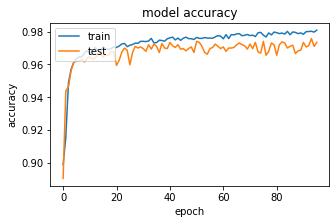

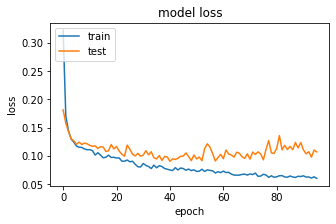

37/37 [==============================] - 0s 8ms/step - loss: 0.0778 - accuracy: 0.9765
acc :  0.9765027165412903
         0
0     1.00
1     1.00
2     1.00
3     1.00
4     1.00
...    ...
3655  1.00
3656  1.00
3657  0.95
3658  0.99
3659  1.00

[3660 rows x 1 columns]
11234    1
6761     1
8691     1
3861     1
533      1
        ..
4841     1
13454    1
16240    1
8425     1
9935     1
Name: Label, Length: 3660, dtype: int64


In [ ]:
acc_graph(history)
evaluate(model1, x_val, y_val)

In [ ]:
pred = pd.DataFrame(data= result)
pred
pred = pred[0].apply(lambda x : 1 if x >=0.5 else 0)

In [ ]:
#evaluate the model : precision, recall, f1score (accuracy is in the above)
from sklearn.metrics import precision_score, recall_score, f1_score
# pred = model1.predict(x_val,  verbose=0)
p = precision_score(y_val, pred)
print(p)
r = recall_score(y_val, pred)
print(r)
f1 = f1_score(y_val, pred)
print(f1)

0.9861570869696058
0.9879409104612602
0.9870481927710845


###Hyper parameter tuning

In [ ]:
!pip install "ipython>=7"

In [ ]:
from IPython import display
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

#내 dnn모델이랑 똑같이 모델 만들어준거
def model_builder(hp):
  model = keras.Sequential()
  hp_units = hp.Int('units', min_value=92, max_value=128, step=4) #여기서 min value랑 max value 설정해서 무슨파라미터가 성능 젤 좋은지 체크할 수 있음
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=2*hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=4*hp_units, activation='relu'))
  model.add(Dropout(0.5))
  model.add(keras.layers.Dense(units=8*hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=4*hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=2*hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  # Add next layers
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  hp_learning_rate = hp.Choice('learning_rate',values = [0.05, 0.01, 0.005, 0.001])   #learning rate도 이중에 뭐가 젤 좋은지 알고싶다
  
  opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
  model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])
	
  return model

In [ ]:
# 케라스튜너로 hyperparameter tuning을 돌려줍니다

tuner = kt.Hyperband(model_builder, 
                    objective='val_accuracy',
                    max_epochs=10,
                    factor=3,
                    directory = '2me',
                    project_name='bobai5')


tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
최적화된 첫 번째 Dense 노드 수 : {best_hp.get('units')} 
최적화된  learnig rate : {best_hp.get('learning_rate')} 입니다.
""")

# best 파라미터로 모델 형성
model = tuner.hypermodel.build(best_hp)
model.fit(x_train, y_train, epochs=10, validation_data = (x_val, y_val))

Trial 21 Complete [00h 00m 40s]
val_accuracy: 0.9704918265342712

Best val_accuracy So Far: 0.9704918265342712
Total elapsed time: 00h 09m 24s

Search: Running Trial #22

Hyperparameter    |Value             |Best Value So Far 
units             |96                |128               
learning_rate     |0.01              |0.001             
tuner/epochs      |4                 |4                 
tuner/initial_e...|0                 |0                 
tuner/bracket     |1                 |1                 
tuner/round       |0                 |0                 

Epoch 1/4
458/458 [==============================] - 6s 12ms/step - loss: 0.2033 - accuracy: 0.9192 - val_loss: 0.1595 - val_accuracy: 0.9063
Epoch 2/4
458/458 [==============================] - 5s 11ms/step - loss: 0.1806 - accuracy: 0.9424 - val_loss: 0.1612 - val_accuracy: 0.9434
Epoch 3/4
458/458 [==============================] - 5s 11ms/step - loss: 0.1821 - accuracy: 0.9440 - val_loss: 0.1415 - val_accuracy: 0.9385
Epo

KeyboardInterrupt: ignored

In [ ]:
#그리고 여기서 나온 젤 좋은 hyper parameter가지고 모델 파라미터 수정해주면됨
best_hp=tuner.get_best_hyperparameters()[0]

In [ ]:
print(best_hp)

###Prediction

In [ ]:
#Assume that the data(that we gonna predict) are preprocessed
#and we call that data 'x_pred'
y_pred = model1.predict(x_pred)

In [ ]:
pred = pd.DataFrame(data= y_pred)
pred
pred = pred[0].apply(lambda x : 1 if x >=0.5 else 0) #if the ai score is higher than 0.5, that coin is malicious

#'pred' is a label, and 'y_pred' is the ai score
predicted_data = x_pred
predicted_data['label'] = pred
predicted_data['predictionscore'] = y_pred
predicted_data.to_csv('predctionresult.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
